In [224]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc
import sklearn.metrics as sm

Medições

In [225]:
 ### θ varia de 0 a 360 ####
theta = np.arange(0, 365, 5)  

### medições feitas em https://www.uv.es/indoptic/applets/Malus/index.html ###
I = [50, 49.62, 48.49, 46.65, 44.15, 41.07, 37.50, 33.55, 29.34, 25, 20.66, 16.45, 12.50, 8.93, 5.85, 3.35, 1.51, 0.38, 0, 0.38, 1.51, 3.35, 5.85, 8.93, 12.5,
    16.45, 20.66, 25, 29.34, 33.55, 37.5, 41.07, 44.15, 46.65, 48.49, 49.62, 50, 49.62, 48.49, 46.65, 44.15, 41.07, 37.50, 33.55, 29.34, 25, 20.66, 16.45, 12.50,
    8.93, 5.85, 3.35, 1.51, 0.38, 0, 0.38, 1.51, 3.35, 5.85, 8.93, 12.50, 16.45, 20.66,  25, 29.34, 33.55, 37.50, 41.07, 44.15, 46.65, 48.49, 49.62, 50] #medições feitas em



criando lista para a função cos²(θ)

In [226]:
def func(x):
    return (np.cos(np.radians(x)))**2

#criando lista vazia apra adicionar números
cos_2 = [] #cos²(θ)  

In [227]:
### adicionando itens a lista cos_2 ###
for c in range(len(theta)):
    cos_2.append( func(theta[c]) )

criando dados da tabela

In [228]:
data = {

    'Intensidade Luminosa': I,
    'θ': theta,
    'cos²(θ)': cos_2

}

criando dataframe

In [229]:
df = pd.DataFrame(data).round(2)

In [230]:
display(df)

,Intensidade Luminosa,θ,cos²(θ)
0,50.00,0,1.00
1,49.62,5,0.99
2,48.49,10,0.97
3,46.65,15,0.93
4,44.15,20,0.88
...,...,...,...
68,44.15,340,0.88
69,46.65,345,0.93
70,48.49,350,0.97
71,49.62,355,0.99


ajustando a curva Acos^2(x + B)

In [231]:
def fit_func(x, A, B):
    return A*(np.cos(np.radians(x) + B))**2

params = sc.curve_fit(fit_func, theta, I)


[A, B] = params[0]

obtendo os erros nos parâmetros do ajuste

In [232]:
error_A, error_B = np.sqrt(np.diag(params[1]))

criando lista para os valores previstos pela curva ajustada

In [233]:
prev = []

for c in range(len(theta)):
    prev.append(fit_func(x=theta[c], A=A, B=B))

obtendo r^2

In [234]:
r_squared = sm.r2_score(I, prev)

saidas

In [235]:
print('θ = {:.4f} ± {:.4e}' .format(A, error_A))
print('ϕ = {:.4f} ± {:.4e}' .format(B, error_B))
print('R²={:.4f}%' .format(r_squared*100))

θ = 49.9994 ± 1.7629e-04
ϕ = -21.9911 ± 3.1095e-06
R²=100.0000%


plotando gráfico ajustado e medições

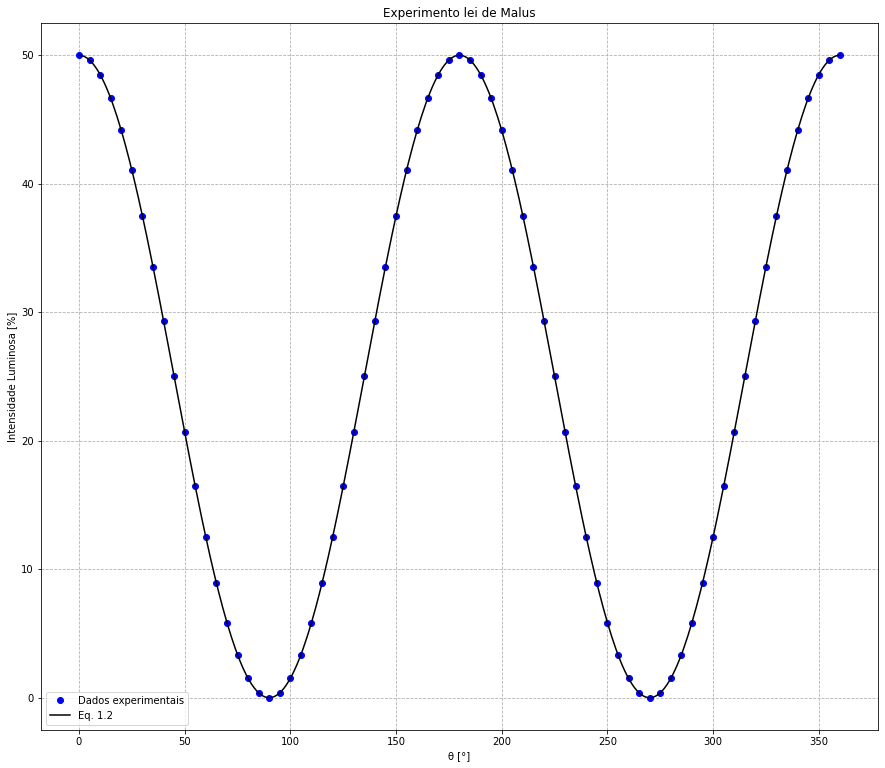

In [236]:
plt.figure(figsize=((15,13)))
plt.plot(theta, I, 'yo', color = 'blue', label = 'Dados experimentais')
plt.plot(fit_func(x=np.arange(0, 361), A=A, B=B), color = 'black', label = 'Eq. 1.2')
plt.grid(ls='--')
plt.xlabel('θ [°]')
plt.title('Experimento lei de Malus')
plt.ylabel('Intensidade Luminosa [%]')
plt.legend()
plt.show()
    

ajustando os pontos em uma função linear

In [237]:
def fit_func_lin(x, a, b):
    return a*x + b

params_lin = sc.curve_fit(fit_func_lin, cos_2, I)

a, b = params_lin[0]

obtendo os erros do ajuste a função linear

In [238]:
error_a, error_b = np.sqrt(np.diag(params_lin[1]))

criando lista para os valores previstos pela curva ajustada

In [239]:
prev1= []

for c in range(len(cos_2)):
    prev1.append(fit_func_lin(x=cos_2[c], a=a, b=b))

obtendo r^2

In [240]:
r_squared1 = sm.r2_score(I, prev1)

saidas

In [241]:
print('a = {:.4f} ± {:.4e}' .format(a, error_a))
print('b = {:.4f} ± {:.4e}' .format(b, error_b))
print('R²={:.4f}%' .format(r_squared1*100))

a = 49.9983 ± 2.5795e-04
b = 0.0009 ± 1.5977e-04
R²=100.0000%


plotando a função linear

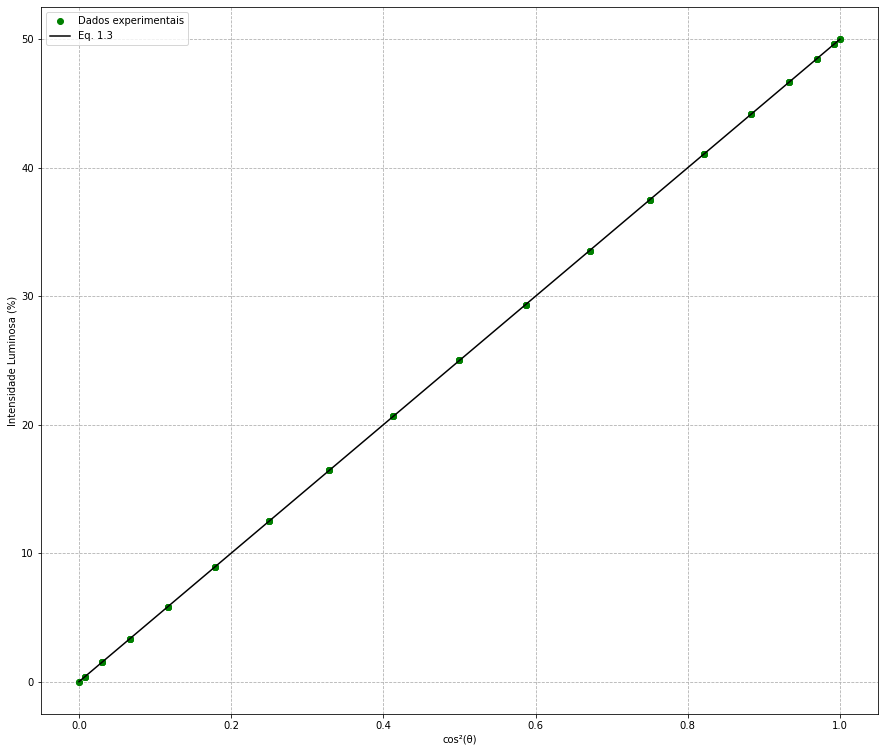

In [242]:
x = np.arange(0, 2)
plt.figure(figsize=((15,13)))
plt.plot(cos_2, I, 'yo', color = 'green', label = 'Dados experimentais')
plt.plot(fit_func_lin(x=x, a=a, b=b), color = 'black', label = 'Eq. 1.3')
plt.grid(ls='--')
plt.xlabel('cos²(θ)')
plt.ylabel('Intensidade Luminosa (%)')
plt.legend()
plt.show()